In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# import Keras Network lib
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, GRU

# import RMSE,MSE,MAPE lib
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('../ETH-USD.csv')
df1=df.reset_index()['Close']
df1

0        320.884003
1        299.252991
2        314.681000
3        307.907990
4        316.716003
           ...     
2039    1752.384766
2040    1753.415283
2041    1742.528687
2042    1739.037598
2043    1650.519287
Name: Close, Length: 2044, dtype: float64

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
18/18 [==============================] - 13s 213ms/step - loss: 0.0046 - val_loss: 0.0961
Epoch 2/100
18/18 [==============================] - 2s 96ms/step - loss: 5.8667e-04 - val_loss: 0.0131
Epoch 3/100
18/18 [==============================] - 2s 92ms/step - loss: 1.6758e-04 - val_loss: 0.0027
Epoch 4/100
18/18 [==============================] - 2s 100ms/step - loss: 1.0332e-04 - val_loss: 0.0026
Epoch 5/100
18/18 [==============================] - 2s 110ms/step - loss: 9.2521e-05 - val_loss: 0.0022
Epoch 6/100
18/18 [==============================] - 2s 99ms/step - loss: 8.9071e-05 - val_loss: 0.0020
Epoch 7/100
18/18 [==============================] - 2s 139ms/step - loss: 8.5838e-05 - val_loss: 0.0019
Epoch 8/100
18/18 [==============================] - 2s 99ms/step - loss: 8.6358e-05 - val_loss: 0.0017
Epoch 9/100
18/18 [==============================] - 2s 95ms/step - loss: 8.5865e-05 - val_loss: 0.0019
Epoch 10/100
18/18 [==============================] - 2s 114ms/

Epoch 78/100
18/18 [==============================] - 3s 169ms/step - loss: 4.3690e-05 - val_loss: 0.0011
Epoch 79/100
18/18 [==============================] - 3s 178ms/step - loss: 4.3576e-05 - val_loss: 9.8958e-04
Epoch 80/100
18/18 [==============================] - 3s 183ms/step - loss: 4.0740e-05 - val_loss: 9.8863e-04
Epoch 81/100
18/18 [==============================] - 3s 195ms/step - loss: 4.0576e-05 - val_loss: 9.7783e-04
Epoch 82/100
18/18 [==============================] - 4s 212ms/step - loss: 3.9569e-05 - val_loss: 8.9481e-04
Epoch 83/100
18/18 [==============================] - 4s 201ms/step - loss: 4.1778e-05 - val_loss: 0.0010
Epoch 84/100
18/18 [==============================] - 3s 176ms/step - loss: 4.1484e-05 - val_loss: 8.9092e-04
Epoch 85/100
18/18 [==============================] - 4s 204ms/step - loss: 4.0570e-05 - val_loss: 0.0011
Epoch 86/100
18/18 [==============================] - 3s 170ms/step - loss: 4.0792e-05 - val_loss: 9.1691e-04
Epoch 87/100
18/18 [==

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

10/10 [==============================] - 0s 20ms/step


In [11]:
rmse = mean_squared_error(ytest, y_pred, squared=False)
print("RMSE on test set: {:.3f}".format(rmse))
rmse = mean_squared_error(yval, y_pred_val, squared=False)
print("RMSE on validation set: {:.3f}".format(rmse))
mape = mean_absolute_percentage_error(ytest, y_pred)
print("MAPE on test set: {:.3f}".format(mape))
mape = mean_absolute_percentage_error(yval, y_pred_val)
print("MAPE on validation set: {:.3f}".format(mape))
evs = explained_variance_score(ytest, y_pred)
print("The explained variance score (EVS) on test set: {:.3f}".format(evs))
evs = explained_variance_score(yval, y_pred_val)
print("The explained variance score (EVS) on validate set: {:.3f}".format(evs))

RMSE on test set: 0.030
RMSE on validation set: 0.012
MAPE on test set: 0.034
MAPE on validation set: 0.026
The explained variance score (EVS) on test set: 0.961
The explained variance score (EVS) on validate set: 0.952


In [12]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [13]:

# 13. Dự báo 30 ngày tiếp theo
x_input = val_data[60:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while i < 30 and len(temp_input) >= n_steps:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input[-n_steps:])
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1


0 day input [0.312541   0.30665137 0.28646695 0.28445698 0.29576433 0.31853956
 0.33757936 0.34248613 0.33247582 0.33692504 0.36130639 0.35478632
 0.35984512 0.34921534 0.36432591 0.34972208 0.36636586 0.35275263
 0.35100127 0.35775116 0.34501454 0.35713964 0.36141569 0.36135971
 0.36755393 0.36582765 0.36198811 0.36507391 0.37791462 0.38597525
 0.37832019 0.37677898 0.37336556 0.37545737 0.38641806 0.38239549
 0.38842209 0.4078715  0.42669659 0.42475726 0.43058221 0.42132565
 0.42731037 0.39174739 0.39316333 0.37347168 0.37859644 0.37602301
 0.37193979 0.37701537 0.37697529 0.38590595 0.38246383 0.38593358
 0.37916662 0.36965486 0.37786897 0.38503143 0.37933156 0.40415438
 0.38409441 0.37835273 0.37326922 0.37317624 0.3718645  0.36215362
 0.36459222 0.36207414 0.36300188 0.366608   0.36799798 0.36751957
 0.36326152 0.36555878 0.36722734 0.36385437 0.3666048  0.37439827
 0.36291706 0.36415522 0.36896423 0.36947792 0.38635601 0.38258341
 0.38426464 0.37857568 0.37605249 0.38558237 0.382

7 day output [[0.3425003]]
8 day input [0.33247582 0.33692504 0.36130639 0.35478632 0.35984512 0.34921534
 0.36432591 0.34972208 0.36636586 0.35275263 0.35100127 0.35775116
 0.34501454 0.35713964 0.36141569 0.36135971 0.36755393 0.36582765
 0.36198811 0.36507391 0.37791462 0.38597525 0.37832019 0.37677898
 0.37336556 0.37545737 0.38641806 0.38239549 0.38842209 0.4078715
 0.42669659 0.42475726 0.43058221 0.42132565 0.42731037 0.39174739
 0.39316333 0.37347168 0.37859644 0.37602301 0.37193979 0.37701537
 0.37697529 0.38590595 0.38246383 0.38593358 0.37916662 0.36965486
 0.37786897 0.38503143 0.37933156 0.40415438 0.38409441 0.37835273
 0.37326922 0.37317624 0.3718645  0.36215362 0.36459222 0.36207414
 0.36300188 0.366608   0.36799798 0.36751957 0.36326152 0.36555878
 0.36722734 0.36385437 0.3666048  0.37439827 0.36291706 0.36415522
 0.36896423 0.36947792 0.38635601 0.38258341 0.38426464 0.37857568
 0.37605249 0.38558237 0.38244261 0.38204096 0.3653978  0.38076791
 0.36974818 0.37268949 0

15 day output [[0.35313144]]
16 day input [0.36636586 0.35275263 0.35100127 0.35775116 0.34501454 0.35713964
 0.36141569 0.36135971 0.36755393 0.36582765 0.36198811 0.36507391
 0.37791462 0.38597525 0.37832019 0.37677898 0.37336556 0.37545737
 0.38641806 0.38239549 0.38842209 0.4078715  0.42669659 0.42475726
 0.43058221 0.42132565 0.42731037 0.39174739 0.39316333 0.37347168
 0.37859644 0.37602301 0.37193979 0.37701537 0.37697529 0.38590595
 0.38246383 0.38593358 0.37916662 0.36965486 0.37786897 0.38503143
 0.37933156 0.40415438 0.38409441 0.37835273 0.37326922 0.37317624
 0.3718645  0.36215362 0.36459222 0.36207414 0.36300188 0.366608
 0.36799798 0.36751957 0.36326152 0.36555878 0.36722734 0.36385437
 0.3666048  0.37439827 0.36291706 0.36415522 0.36896423 0.36947792
 0.38635601 0.38258341 0.38426464 0.37857568 0.37605249 0.38558237
 0.38244261 0.38204096 0.3653978  0.38076791 0.36974818 0.37268949
 0.37140418 0.35282454 0.35304251 0.35073982 0.3500014  0.33127838
 0.33776933 0.33618104

23 day output [[0.36341453]]
24 day input [0.36755393 0.36582765 0.36198811 0.36507391 0.37791462 0.38597525
 0.37832019 0.37677898 0.37336556 0.37545737 0.38641806 0.38239549
 0.38842209 0.4078715  0.42669659 0.42475726 0.43058221 0.42132565
 0.42731037 0.39174739 0.39316333 0.37347168 0.37859644 0.37602301
 0.37193979 0.37701537 0.37697529 0.38590595 0.38246383 0.38593358
 0.37916662 0.36965486 0.37786897 0.38503143 0.37933156 0.40415438
 0.38409441 0.37835273 0.37326922 0.37317624 0.3718645  0.36215362
 0.36459222 0.36207414 0.36300188 0.366608   0.36799798 0.36751957
 0.36326152 0.36555878 0.36722734 0.36385437 0.3666048  0.37439827
 0.36291706 0.36415522 0.36896423 0.36947792 0.38635601 0.38258341
 0.38426464 0.37857568 0.37605249 0.38558237 0.38244261 0.38204096
 0.3653978  0.38076791 0.36974818 0.37268949 0.37140418 0.35282454
 0.35304251 0.35073982 0.3500014  0.33127838 0.33776933 0.33618104
 0.33644235 0.3373785  0.33856443 0.33984631 0.34116602 0.3425003
 0.34383917 0.3451781

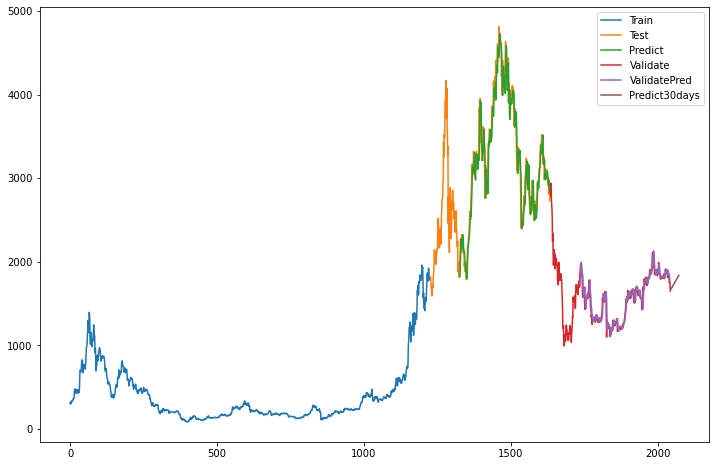

In [14]:
# 14.Vẽ hình

plt.subplots(figsize=(12, 8))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()